In [1]:
import rmgpy
from rmgpy.data.rmg import RMGDatabase
from rmgpy.reaction import Reaction
from rmgpy.molecule.molecule import Molecule

In [2]:
databasePath = rmgpy.settings['database.directory']

database = RMGDatabase()
database.load(
    path = databasePath,
    thermoLibraries = [],
    reactionLibraries = [],
    seedMechanisms = [],
    kineticsFamilies = ['H_Abstraction'],
    )

In [3]:
reactants = [
    Molecule().fromAdjacencyList("""multiplicity 3
1 C u1 p0 c0 {2,S} {3,D}
2 H u0 p0 c0 {1,S}
3 N u0 p1 c0 {1,D} {4,S}
4 N u0 p1 c0 {3,S} {5,D}
5 C u0 p0 c0 {4,D} {6,D}
6 C u1 p0 c0 {5,D} {7,S}
7 H u0 p0 c0 {6,S}
"""), 
    Molecule().fromAdjacencyList("""multiplicity 3
1 C u0 p0 c0 {2,D} {6,S} {7,S}
2 N u0 p1 c0 {1,D} {3,S}
3 N u1 p1 c0 {2,S} {4,S}
4 C u0 p0 c0 {3,S} {5,T}
5 C u1 p0 c0 {4,T}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}
""")]

In [4]:
rxns = database.kinetics.families['H_Abstraction'].generateReactions(reactants)

ERROR:root:Expecting one matching reverse reaction, not 2 in reaction family H_Abstraction for forward reaction <Molecule "N(=C=[CH])N=[CH]"> + <Molecule "C=N[N]C#[C]"> <=> <Molecule "C=N[N]C#C"> + <Molecule "N(=C=[C])N=[CH]">.



Found the following reverse reactions
<Molecule "C=N[N]C#C"> + <Molecule "N(=C=[C])N=[CH]"> <=> <Molecule "C=NN=C=[C]"> + <Molecule "[N](N=[CH])C#C">
Reactant
multiplicity 2
1 C u0 p0 c0 {2,D} {6,S} {7,S}
2 N u0 p1 c0 {1,D} {3,S}
3 N u1 p1 c0 {2,S} {4,S}
4 C u0 p0 c0 {3,S} {5,T}
5 C u0 p0 c0 {4,T} {8,S}
6 H u0 p0 c0 {1,S}
7 H u0 p0 c0 {1,S}
8 H u0 p0 c0 {5,S}

Reactant
multiplicity 4
1 N u0 p1 c0 {2,S} {3,D}
2 N u0 p1 c0 {1,S} {4,D}
3 C u0 p0 c0 {1,D} {5,D}
4 C u1 p0 c0 {2,D} {6,S}
5 C u2 p0 c0 {3,D}
6 H u0 p0 c0 {4,S}

Product
multiplicity 3
1 *1 C u0 p0 c0 {2,D} {5,S} {6,S}
2    N u0 p1 c0 {1,D} {3,S}
3    N u0 p1 c0 {2,S} {4,D}
4    C u0 p0 c0 {3,D} {7,D}
5    H u0 p0 c0 {1,S}
6 *2 H u0 p0 c0 {1,S}
7    C u2 p0 c0 {4,D}

Product
multiplicity 3
1    N u1 p1 c0 {2,S} {3,S}
2    N u0 p1 c0 {1,S} {4,D}
3    C u0 p0 c0 {1,S} {5,T}
4 *3 C u1 p0 c0 {2,D} {6,S}
5    C u0 p0 c0 {3,T} {7,S}
6    H u0 p0 c0 {4,S}
7    H u0 p0 c0 {5,S}

<Molecule "C=N[N]C#C"> + <Molecule "N(=C=[C])N=[CH]"> <=> 

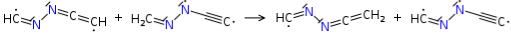

In [12]:
rxns[3]

In [22]:
out1 = reactants[0].generateResonanceIsomers()

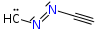

In [25]:
out1[2]

In [6]:
out2 = reactants[1].generateResonanceIsomers()

In [19]:
Molecule().fromAdjacencyList(out2[1].toAdjacencyList()).generateResonanceIsomers()

[Molecule(SMILES="[CH2]N=NC#[C]"),
 Molecule(SMILES="C=N[N]C#[C]"),
 Molecule(SMILES="C=NN=C=[C]")]

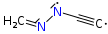

In [15]:
out2[0]

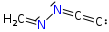

In [20]:
out2[2]

In [35]:
reactants = [
    Molecule().fromSMILES('C=[C]'), 
    Molecule().fromSMILES('C#C')]
rxns = database.kinetics.families['H_Abstraction'].generateReactions(reactants)

In [36]:
rxns

[Reaction(reactants=[Molecule(SMILES="[C]=C"), Molecule(SMILES="C#C")], products=[Molecule(SMILES="[CH]=C"), Molecule(SMILES="[C]#C")], degeneracy=2, pairs=[[Molecule(SMILES="[C]=C"), Molecule(SMILES="[CH]=C")], [Molecule(SMILES="C#C"), Molecule(SMILES="[C]#C")]])]

In [37]:
rxns[0]